In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Checking stocks

In [48]:
stocks_all = ['CHMF','TATNP','NLMK','GMKN','AKRN','VSMO','MAGN','SNGSP','MTSS','SIBN','SBER','LKOH']
max_bye_price = [800,280,140,10500,3200,11000,25,30,230,220,110,3500]
#['NLMK','RASP','SBERP','SIBN','SNGSP','SVAV','VSMO','AFLT','GAZP','SBER','ROSN','SNGS','LKOH','RTKM','TATN','TATNP','MTSS','AKRN','CHMF','GMKN','MAGN','MGNT']

In [3]:
in_lot = pd.read_excel('stock_in_lot.xlsx')
in_lot[in_lot.stock=='AFLT'].stock_in_lot.values

array([100], dtype=int64)

In [4]:
divs = pd.read_excel('Dividends.xlsx', parse_dates=[1])
divs = pd.merge(divs, in_lot, left_on = 'tiker', right_on = 'stock').drop('stock',axis=1)
divs['div_by_lot'] = divs.dividend*divs.stock_in_lot

In [5]:
divs['month'] = divs['date'].apply(lambda x : x.month)
divs['year'] = divs['date'].apply(lambda x : x.year)
divs['month_id']=divs['year']*100+divs['month']

In [6]:
divs.head()

,tiker,date,dividend,stock_in_lot,div_by_lot,month,year,month_id
0,AFLT,2003-03-07,0.29,100,29.0,3,2003,200303
1,AFLT,2004-04-19,0.43,100,43.0,4,2004,200404
2,AFLT,2005-04-30,0.70,100,70.0,4,2005,200504
3,AFLT,2006-04-29,0.82,100,82.0,4,2006,200604
4,AFLT,2007-05-07,1.29,100,129.0,5,2007,200705


Download Data

In [7]:
prices = pd.DataFrame()
for paper in stocks_all:
    a = pd.read_csv(str(paper)+str('_070601_180903.csv'), parse_dates=[0])
    a['paper'] = paper
    a.columns = ['date', 'time', 'open', 'high', 'low', 'close','vol', 'paper']
    a.drop(['time', 'open', 'high', 'low','vol'],axis=1,inplace=True)
    a.close=a.close*in_lot[in_lot.stock==paper].stock_in_lot.values
    prices = prices.append(a)
#prices.columns = ['date', 'time', 'open', 'high', 'low', 'close','vol', 'paper']

In [8]:
def rand_date(array):
    len_ar = len(array)
    position = np.random.randint(len_ar)
    return array[position]

In [9]:
prices['month'] = prices['date'].apply(lambda x : x.month)
prices['year'] = prices['date'].apply(lambda x : x.year)
prices['month_id']=prices['year']*100+prices['month']
months = np.unique(np.sort(prices['month_id']))

In [10]:
name = 'Юрий'

after buy CHMF 3628.1 13899.73223
after buy TATNP 674.5 13224.085579999999
after buy NLMK 765.0 12457.78508
after buy GMKN 5399.79 7048.815436999999
after buy AKRN 609.98 6437.798470999999
not enough money for buy VSMO 7779.0 6437.798470999999
after buy SNGSP 1738.3 4696.543360999999
after buy SIBN 1037.6000000000001 3657.179440999999
after buy LKOH 1992.49 1661.3022079999987
paper is expensive or you enough to by they (dolya>) SBER 1661.3022079999987
paper is expensive or you enough to by they (dolya>) MTSS 1661.3022079999987
paper is expensive or you enough to by they (dolya>) MAGN 1661.3022079999987

in portfolio 1 CHMF [3628.1] [3628.1]
in portfolio 1 TATNP [674.5] [674.5]
in portfolio 1 NLMK [765.] [765.]
in portfolio 1 GMKN [5399.79] [5399.79]
in portfolio 1 AKRN [609.98] [609.98]
in portfolio 0 VSMO [7779.] [0.]
in portfolio 0 MAGN [2607.] [0.]
in portfolio 1 SNGSP [1738.3] [1738.3]
in portfolio 0 MTSS [2569.9] [0.]
in portfolio 1 SIBN [1037.6] [1037.6]
in portfolio 0 SBER [1000

C:\Users\1INVESTOR\Anaconda3\lib\site-packages\ipykernel_launcher.py:114: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


200706 17684 17684.0 [17507.062208] 1661.3022079999987
after buy TATNP 747.0999999999999 13205.932138
after buy NLMK 861.0 12343.468438
after buy AKRN 644.99 11697.381955
after buy VSMO 7949.0 3734.868655
after buy SNGSP 1870.0 1861.6896550000001
after buy SIBN 1096.0 763.8264550000001
not enough money for buy SBER 1092.0 763.8264550000001
paper is expensive or you enough to by they (dolya>) MTSS 763.8264550000001
paper is expensive or you enough to by they (dolya>) MAGN 763.8264550000001
paper is expensive or you enough to by they (dolya>) GMKN 763.8264550000001
paper is expensive or you enough to by they (dolya>) LKOH 763.8264550000001
paper is expensive or you enough to by they (dolya>) CHMF 763.8264550000001

in portfolio 1 CHMF [4485.2] [4485.2]
in portfolio 2 TATNP [747.1] [1494.2]
in portfolio 2 NLMK [861.] [1722.]
in portfolio 1 GMKN [5569.] [5569.]
in portfolio 2 AKRN [644.99] [1289.98]
in portfolio 1 VSMO [7949.] [7949.]
in portfolio 0 MAGN [2935.] [0.]
in portfolio 2 SNGSP [

in portfolio 2 GMKN [6460.] [12920.]
in portfolio 9 AKRN [1234.9] [11114.1]
in portfolio 2 VSMO [7950.] [15900.]
in portfolio 0 MAGN [3150.] [0.]
in portfolio 5 SNGSP [1555.] [7775.]
in portfolio 0 MTSS [3775.] [0.]
in portfolio 7 SIBN [1530.] [10710.]
in portfolio 5 SBER [1020.] [5100.]
in portfolio 4 LKOH [2067.1] [8268.4]
after buy TATNP 870.0 475.22970999999256
not enough money for buy NLMK 995.1 475.22970999999256
not enough money for buy SNGSP 1555.0 475.22970999999256
not enough money for buy SBER 1020.0 475.22970999999256
not enough money for buy LKOH 2067.1 475.22970999999256
paper is expensive or you enough to by they (dolya>) MTSS 475.22970999999256
paper is expensive or you enough to by they (dolya>) MAGN 475.22970999999256
paper is expensive or you enough to by they (dolya>) AKRN 475.22970999999256
paper is expensive or you enough to by they (dolya>) SIBN 475.22970999999256
paper is expensive or you enough to by they (dolya>) VSMO 475.22970999999256
paper is expensive or y

not enough money for buy SNGSP 1170.0 1085.6562689999892
not enough money for buy SIBN 1415.0 1085.6562689999892
after buy SBER 741.9 342.4950389999891
not enough money for buy LKOH 2125.15 342.4950389999891
paper is expensive or you enough to by they (dolya>) MTSS 342.4950389999891
paper is expensive or you enough to by they (dolya>) MAGN 342.4950389999891
paper is expensive or you enough to by they (dolya>) AKRN 342.4950389999891
paper is expensive or you enough to by they (dolya>) NLMK 342.4950389999891
paper is expensive or you enough to by they (dolya>) VSMO 342.4950389999891
paper is expensive or you enough to by they (dolya>) GMKN 342.4950389999891
paper is expensive or you enough to by they (dolya>) CHMF 342.4950389999891

in portfolio 3 CHMF [6030.] [18090.]
in portfolio 17 TATNP [826.] [14042.]
in portfolio 13 NLMK [1171.] [15223.]
in portfolio 3 GMKN [6794.] [20382.]
in portfolio 9 AKRN [2187.] [19683.]
in portfolio 3 VSMO [5210.] [15630.]
in portfolio 0 MAGN [3120.] [0.]
in

after buy TATNP 639.8 9376.021834999989
after buy MAGN 2450.0 6921.856834999989
after buy SNGSP 946.1999999999999 5974.048294999989
after buy SIBN 1213.0 4758.986194999989
after buy SBER 611.0 4146.9474949999885
paper is expensive or you enough to by they (dolya>) MTSS 4146.9474949999885
paper is expensive or you enough to by they (dolya>) AKRN 4146.9474949999885
paper is expensive or you enough to by they (dolya>) NLMK 4146.9474949999885
paper is expensive or you enough to by they (dolya>) VSMO 4146.9474949999885
paper is expensive or you enough to by they (dolya>) GMKN 4146.9474949999885
paper is expensive or you enough to by they (dolya>) LKOH 4146.9474949999885
paper is expensive or you enough to by they (dolya>) CHMF 4146.9474949999885

in portfolio 5 CHMF [4290.] [21450.]
in portfolio 24 TATNP [639.8] [15355.2]
in portfolio 18 NLMK [957.] [17226.]
in portfolio 5 GMKN [4664.99] [23324.95]
in portfolio 10 AKRN [1775.] [17750.]
in portfolio 6 VSMO [3330.] [19980.]
in portfolio 3 MAG

after buy AKRN 285.21 11855.250182999987
after buy VSMO 817.89 11035.969769999987
after buy MAGN 562.1 10472.914199999987
after buy MTSS 1060.1000000000001 9411.012029999987
after buy SBER 152.0 9258.753629999987
paper is expensive or you enough to by they (dolya>) SIBN 9258.753629999987
paper is expensive or you enough to by they (dolya>) LKOH 9258.753629999987
paper is expensive or you enough to by they (dolya>) SNGSP 9258.753629999987

in portfolio 11 CHMF [741.7] [8158.7]
in portfolio 32 TATNP [214.5] [6864.]
in portfolio 24 NLMK [351.5] [8436.]
in portfolio 7 GMKN [1220.01] [8540.07]
in portfolio 17 AKRN [285.21] [4848.57]
in portfolio 10 VSMO [817.89] [8178.9]
in portfolio 10 MAGN [562.1] [5621.]
in portfolio 17 SNGSP [603.] [10251.]
in portfolio 5 MTSS [1060.1] [5300.5]
in portfolio 14 SIBN [610.] [8540.]
in portfolio 21 SBER [152.] [3192.]
in portfolio 10 LKOH [995.01] [9950.1]
after buy CHMF 741.7 8515.792739999986
after buy TATNP 214.5 8300.928089999987
after buy NLMK 351.5 7

after buy VSMO 729.99 3651.214880999984
after buy SBER 233.6 3417.217760999984
paper is expensive or you enough to by they (dolya>) AKRN 3417.217760999984
paper is expensive or you enough to by they (dolya>) NLMK 3417.217760999984
paper is expensive or you enough to by they (dolya>) SIBN 3417.217760999984
paper is expensive or you enough to by they (dolya>) GMKN 3417.217760999984
paper is expensive or you enough to by they (dolya>) LKOH 3417.217760999984
paper is expensive or you enough to by they (dolya>) CHMF 3417.217760999984
paper is expensive or you enough to by they (dolya>) MTSS 3417.217760999984
paper is expensive or you enough to by they (dolya>) TATNP 3417.217760999984
paper is expensive or you enough to by they (dolya>) SNGSP 3417.217760999984
paper is expensive or you enough to by they (dolya>) MAGN 3417.217760999984

in portfolio 12 CHMF [1308.] [15696.]
in portfolio 38 TATNP [319.8] [12152.4]
in portfolio 28 NLMK [459.9] [12877.2]
in portfolio 8 GMKN [2205.] [17640.]
in p

in portfolio 42 TATNP [425.] [17850.]
in portfolio 31 NLMK [592.8] [18376.8]
in portfolio 8 GMKN [3550.] [28400.]
in portfolio 27 AKRN [775.] [20925.]
in portfolio 16 VSMO [1565.] [25040.]
in portfolio 17 MAGN [1568.] [26656.]
in portfolio 18 SNGSP [1012.] [18216.]
in portfolio 11 MTSS [1759.7] [19356.7]
in portfolio 18 SIBN [1009.5] [18171.]
in portfolio 35 SBER [401.] [14035.]
in portfolio 12 LKOH [1613.44] [19361.28]
after buy CHMF 1570.0 10194.033480999984
after buy TATNP 425.0 9768.310980999984
after buy NLMK 592.8 9174.503220999984
after buy AKRN 775.0 8398.185720999985
after buy SNGSP 1011.9999999999999 7384.465320999985
after buy MTSS 1759.7 5621.773830999985
after buy SIBN 1009.5 4610.557680999985
after buy SBER 401.0 4208.875980999985
after buy LKOH 1613.44 2592.6931329999843
paper is expensive or you enough to by they (dolya>) AKRN 2592.6931329999843
paper is expensive or you enough to by they (dolya>) NLMK 2592.6931329999843
paper is expensive or you enough to by they (doly


in portfolio 16 CHMF [1660.] [26560.]
in portfolio 48 TATNP [376.8] [18086.4]
in portfolio 36 NLMK [662.4] [23846.4]
in portfolio 9 GMKN [2870.03] [25830.27]
in portfolio 31 AKRN [717.89] [22254.59]
in portfolio 16 VSMO [2045.] [32720.]
in portfolio 18 MAGN [1497.] [26946.]
in portfolio 23 SNGSP [860.3] [19786.9]
in portfolio 15 MTSS [1582.8] [23742.]
in portfolio 22 SIBN [969.] [21318.]
in portfolio 40 SBER [378.3] [15132.]
in portfolio 15 LKOH [1373.73] [20605.95]
200907 8898 310811.0 [277024.233338] 195.72333799998012
after buy TATNP 440.20000000000005 10875.774997999979
after buy SBER 487.5 10387.446247999978
paper is expensive or you enough to by they (dolya>) AKRN 10387.446247999978
paper is expensive or you enough to by they (dolya>) NLMK 10387.446247999978
paper is expensive or you enough to by they (dolya>) SIBN 10387.446247999978
paper is expensive or you enough to by they (dolya>) VSMO 10387.446247999978
paper is expensive or you enough to by they (dolya>) GMKN 10387.446247

in portfolio 39 NLMK [741.] [28899.]
in portfolio 9 GMKN [3651.] [32859.]
in portfolio 35 AKRN [808.] [28280.]
in portfolio 16 VSMO [2185.] [34960.]
in portfolio 18 MAGN [2139.1] [38503.8]
in portfolio 26 SNGSP [1080.4] [28090.4]
in portfolio 16 MTSS [1998.9] [31982.4]
in portfolio 25 SIBN [1230.2] [30755.]
in portfolio 45 SBER [582.8] [26226.]
in portfolio 18 LKOH [1576.02] [28368.36]
200909 13530 335612.0 [371200.71661] 345.55660999997644
after buy TATNP 477.59999999999997 5204.1446899999755
after buy AKRN 814.99 4387.769206999976
after buy SNGSP 1196.0 3189.736006999976
after buy SBER 610.3 2578.398496999976
after buy LKOH 1685.97 889.562347999976
paper is expensive or you enough to by they (dolya>) NLMK 889.562347999976
paper is expensive or you enough to by they (dolya>) SIBN 889.562347999976
paper is expensive or you enough to by they (dolya>) VSMO 889.562347999976
paper is expensive or you enough to by they (dolya>) GMKN 889.562347999976
paper is expensive or you enough to by th


in portfolio 17 CHMF [3281.] [55777.]
in portfolio 60 TATNP [786.5] [47190.]
in portfolio 44 NLMK [908.] [39952.]
in portfolio 12 GMKN [4438.05] [53256.6]
in portfolio 42 AKRN [1004.49] [42188.58]
in portfolio 19 VSMO [3408.] [64752.]
in portfolio 18 MAGN [2896.3] [52133.4]
in portfolio 29 SNGSP [1437.8] [41696.2]
in portfolio 18 MTSS [2282.] [41076.]
in portfolio 27 SIBN [1358.] [36666.]
in portfolio 50 SBER [748.8] [37440.]
in portfolio 21 LKOH [1548.88] [32526.48]
after buy TATNP 786.5 1633.8493269999726
after buy NLMK 908.0 724.3057269999725
not enough money for buy AKRN 1004.49 724.3057269999725
not enough money for buy SNGSP 1437.8 724.3057269999725
not enough money for buy MTSS 2282.0 724.3057269999725
not enough money for buy SIBN 1358.0 724.3057269999725
not enough money for buy SBER 748.8 724.3057269999725
not enough money for buy LKOH 1548.88 724.3057269999725
paper is expensive or you enough to by they (dolya>) MAGN 724.3057269999725
paper is expensive or you enough to by 

after buy NLMK 927.6999999999999 15001.534896999967
after buy AKRN 934.1 14065.846926999966
after buy VSMO 2960.0 11100.814926999967
after buy SNGSP 1294.9 9803.713596999967
after buy SIBN 1167.3 8634.429186999967
after buy SBER 779.5 7853.604036999967
after buy LKOH 1644.0 6206.809236999967
paper is expensive or you enough to by they (dolya>) MTSS 6206.809236999967
paper is expensive or you enough to by they (dolya>) MAGN 6206.809236999967
paper is expensive or you enough to by they (dolya>) GMKN 6206.809236999967
paper is expensive or you enough to by they (dolya>) CHMF 6206.809236999967

in portfolio 18 CHMF [3711.5] [66807.]
in portfolio 71 TATNP [699.7] [49678.7]
in portfolio 55 NLMK [927.7] [51023.5]
in portfolio 13 GMKN [5184.91] [67403.83]
in portfolio 51 AKRN [934.1] [47639.1]
in portfolio 20 VSMO [2960.] [59200.]
in portfolio 21 MAGN [2587.5] [54337.5]
in portfolio 36 SNGSP [1294.9] [46616.4]
in portfolio 18 MTSS [2456.] [44208.]
in portfolio 34 SIBN [1167.3] [39688.2]
in por

in portfolio 59 SBER [1069.9] [63124.1]
in portfolio 29 LKOH [1760.86] [51064.94]
after buy TATNP 833.9 10506.981105999968
after buy NLMK 1381.9 9122.731875999969
after buy AKRN 1112.97 8007.869826999969
after buy SNGSP 1562.5 6442.713576999969
after buy SIBN 1286.6 5153.926356999968
after buy SBER 1069.8999999999999 4082.2075269999686
after buy LKOH 1760.86 2318.3540649999686
paper is expensive or you enough to by they (dolya>) MTSS 2318.3540649999686
paper is expensive or you enough to by they (dolya>) MAGN 2318.3540649999686
paper is expensive or you enough to by they (dolya>) NLMK 2318.3540649999686
paper is expensive or you enough to by they (dolya>) VSMO 2318.3540649999686
paper is expensive or you enough to by they (dolya>) GMKN 2318.3540649999686
paper is expensive or you enough to by they (dolya>) CHMF 2318.3540649999686

in portfolio 18 CHMF [5194.7] [93504.6]
in portfolio 79 TATNP [833.9] [65878.1]
in portfolio 62 NLMK [1381.9] [85677.8]
in portfolio 13 GMKN [6824.] [88712.]


in portfolio 19 CHMF [4901.] [93119.]
in portfolio 86 TATNP [833.8] [71706.8]
in portfolio 68 NLMK [1010.] [68680.]
in portfolio 14 GMKN [7026.] [98364.]
in portfolio 65 AKRN [1295.] [84175.]
in portfolio 26 VSMO [4487.1] [116664.6]
in portfolio 21 MAGN [2525.1] [53027.1]
in portfolio 48 SNGSP [1344.9] [64555.2]
in portfolio 19 MTSS [2291.] [43529.]
in portfolio 43 SIBN [1215.2] [52253.6]
in portfolio 62 SBER [941.9] [58397.8]
in portfolio 32 LKOH [1720.] [55040.]
after buy TATNP 833.8 19584.099357999967
after buy NLMK 1010.0 18572.382357999966
after buy SNGSP 1344.9 17225.196027999966
after buy MTSS 2291.0 14930.301327999965
after buy SIBN 1215.2 13713.035487999965
after buy SBER 941.9 12769.534257999965
after buy LKOH 1720.0 11046.610257999964
paper is expensive or you enough to by they (dolya>) MAGN 11046.610257999964
paper is expensive or you enough to by they (dolya>) AKRN 11046.610257999964
paper is expensive or you enough to by they (dolya>) VSMO 11046.610257999964
paper is exp


in portfolio 19 CHMF [4180.] [79420.]
in portfolio 91 TATNP [850.] [77350.]
in portfolio 75 NLMK [818.] [61350.]
in portfolio 14 GMKN [6873.] [96222.]
in portfolio 65 AKRN [1300.1] [84506.5]
in portfolio 26 VSMO [4635.1] [120512.6]
in portfolio 26 MAGN [1556.1] [40458.6]
in portfolio 53 SNGSP [1530.] [81090.]
in portfolio 24 MTSS [2045.] [49080.]
in portfolio 50 SIBN [1229.9] [61495.]
in portfolio 69 SBER [800.7] [55248.3]
in portfolio 36 LKOH [1741.7] [62701.2]
201109 AKRN dividend - 7294.95
201109 12916 619189.0 [870136.653508] 7997.403507999958
In this month your dividend is  [7294.95]
after buy NLMK 834.4 16913.585027999958
after buy MAGN 1490.0 15421.052027999958
after buy MTSS 1940.0 13477.754027999958
after buy SIBN 1273.7 12201.888737999958
after buy SBER 854.0 11346.436937999957
after buy LKOH 1761.0 9582.443237999956
paper is expensive or you enough to by they (dolya>) AKRN 9582.443237999956
paper is expensive or you enough to by they (dolya>) VSMO 9582.443237999956
paper is


in portfolio 20 CHMF [3640.] [72800.]
in portfolio 91 TATNP [880.8] [80152.8]
in portfolio 82 NLMK [623.1] [51094.2]
in portfolio 15 GMKN [4934.] [74010.]
in portfolio 65 AKRN [1334.5] [86742.5]
in portfolio 26 VSMO [5220.] [135720.]
in portfolio 31 MAGN [1215.7] [37686.7]
in portfolio 53 SNGSP [1638.] [86814.]
in portfolio 28 MTSS [1774.9] [49697.2]
in portfolio 53 SIBN [1495.] [79235.]
in portfolio 75 SBER [788.] [59100.]
in portfolio 40 LKOH [1685.1] [67404.]
201112 16887 655169.0 [880654.734508] 198.33450799995398
after buy NLMK 701.7 5651.441617999954
after buy MAGN 1316.2 4333.0040779999545
after buy MTSS 1987.3 2342.3256679999545
after buy SBER 848.5 1492.3832179999545
not enough money for buy LKOH 1782.0 1492.3832179999545
paper is expensive or you enough to by they (dolya>) AKRN 1492.3832179999545
paper is expensive or you enough to by they (dolya>) SIBN 1492.3832179999545
paper is expensive or you enough to by they (dolya>) VSMO 1492.3832179999545
paper is expensive or you e

in portfolio 37 MAGN [941.6] [34839.2]
in portfolio 54 SNGSP [1724.] [93096.]
in portfolio 32 MTSS [2354.4] [75340.8]
in portfolio 56 SIBN [1364.1] [76389.6]
in portfolio 80 SBER [815.8] [65264.]
in portfolio 43 LKOH [1710.2] [73538.6]
after buy CHMF 3821.0 29576.585767999946
after buy TATNP 837.0 28738.162867999945
after buy NLMK 547.4 28189.832287999943
after buy GMKN 5057.0 23124.235387999943
after buy AKRN 1131.0 21991.312687999944
after buy MAGN 941.6 21048.111967999943
after buy SIBN 1364.1 19681.692997999944
after buy SBER 815.8 18864.506137999942
after buy LKOH 1710.2 17151.398797999944
paper is expensive or you enough to by they (dolya>) MTSS 17151.398797999944
paper is expensive or you enough to by they (dolya>) VSMO 17151.398797999944
paper is expensive or you enough to by they (dolya>) GMKN 17151.398797999944
paper is expensive or you enough to by they (dolya>) SNGSP 17151.398797999944
paper is expensive or you enough to by they (dolya>) CHMF 17151.398797999944

in portfoli

in portfolio 99 NLMK [628.8] [62251.2]
in portfolio 19 GMKN [4945.] [93955.]
in portfolio 71 AKRN [1394.] [98974.]
in portfolio 26 VSMO [5160.] [134160.]
in portfolio 47 MAGN [1097.4] [51577.8]
in portfolio 54 SNGSP [2069.6] [111758.4]
in portfolio 36 MTSS [2270.] [81720.]
in portfolio 61 SIBN [1510.5] [92140.5]
in portfolio 87 SBER [900.7] [78360.9]
in portfolio 48 LKOH [1912.7] [91809.6]
201209 16276 757796.0 [1096573.013718] 112.21371799994131
after buy CHMF 3942.0 11583.512317999941
after buy TATNP 1006.9 10574.90058799994
after buy NLMK 619.5 9954.34743799994
after buy GMKN 4818.0 5128.156837999941
after buy AKRN 1321.0 3804.911137999941
after buy MAGN 1095.0 2708.049637999941
after buy SIBN 1563.0 1142.3925379999407
after buy SBER 941.0 199.79283799994073
not enough money for buy LKOH 1985.9 199.79283799994073
paper is expensive or you enough to by they (dolya>) MTSS 199.79283799994073
paper is expensive or you enough to by they (dolya>) VSMO 199.79283799994073
paper is expensive


in portfolio 30 CHMF [3605.] [108150.]
in portfolio 103 TATNP [1110.] [114330.]
in portfolio 106 NLMK [606.4] [64278.4]
in portfolio 21 GMKN [5574.] [117054.]
in portfolio 76 AKRN [1469.] [111644.]
in portfolio 26 VSMO [5716.] [148616.]
in portfolio 54 MAGN [1021.3] [55150.2]
in portfolio 55 SNGSP [2305.] [126775.]
in portfolio 36 MTSS [2632.5] [94770.]
in portfolio 67 SIBN [1437.3] [96299.1]
in portfolio 93 SBER [1078.2] [100272.6]
in portfolio 51 LKOH [1980.] [100980.]
after buy CHMF 3605.0 1653.924677999939
after buy NLMK 606.4 1046.493797999939
not enough money for buy AKRN 1469.0 1046.493797999939
after buy MAGN 1021.3 23.45758799993905
not enough money for buy SIBN 1437.3 23.45758799993905
not enough money for buy SBER 1078.1999999999998 23.45758799993905
not enough money for buy LKOH 1980.0 23.45758799993905
paper is expensive or you enough to by they (dolya>) MTSS 23.45758799993905
paper is expensive or you enough to by they (dolya>) TATNP 23.45758799993905
paper is expensive 


in portfolio 39 CHMF [2525.] [98475.]
in portfolio 108 TATNP [923.9] [99781.2]
in portfolio 115 NLMK [443.1] [50956.5]
in portfolio 24 GMKN [4627.] [111048.]
in portfolio 82 AKRN [1309.] [107338.]
in portfolio 26 VSMO [5700.1] [148202.6]
in portfolio 63 MAGN [714.6] [45019.8]
in portfolio 56 SNGSP [1963.8] [109972.8]
in portfolio 36 MTSS [2538.3] [91378.8]
in portfolio 73 SIBN [1200.3] [87621.9]
in portfolio 100 SBER [987.] [98700.]
in portfolio 56 LKOH [1883.3] [105464.8]
not enough money for buy CHMF 2525.0 636.6116379999401
not enough money for buy TATNP 923.9 636.6116379999401
after buy NLMK 443.1 192.75836799994
not enough money for buy MAGN 714.6 192.75836799994
not enough money for buy SIBN 1200.3 192.75836799994
not enough money for buy SBER 987.0 192.75836799994
paper is expensive or you enough to by they (dolya>) MTSS 192.75836799994
paper is expensive or you enough to by they (dolya>) AKRN 192.75836799994
paper is expensive or you enough to by they (dolya>) VSMO 192.7583679

in portfolio 57 LKOH [2111.6] [120361.2]
201310 CHMF dividend - 734.454
201310 9349 909131.0 [1320478.745708] 1258.199707999937
In this month your dividend is  [734.454]
after buy NLMK 535.8 9943.488847999937
after buy AKRN 957.0 8984.861947999938
after buy MAGN 784.3 8199.228637999939
after buy SIBN 1474.9 6721.821307999939
after buy SBER 1027.7 5692.374217999939
after buy LKOH 2054.1 3634.782247999939
paper is expensive or you enough to by they (dolya>) MTSS 3634.782247999939
paper is expensive or you enough to by they (dolya>) VSMO 3634.782247999939
paper is expensive or you enough to by they (dolya>) GMKN 3634.782247999939
paper is expensive or you enough to by they (dolya>) CHMF 3634.782247999939
paper is expensive or you enough to by they (dolya>) TATNP 3634.782247999939
paper is expensive or you enough to by they (dolya>) SNGSP 3634.782247999939

in portfolio 42 CHMF [2968.] [124656.]
in portfolio 109 TATNP [1190.] [129710.]
in portfolio 124 NLMK [535.8] [66439.2]
in portfolio 2


in portfolio 46 CHMF [2892.] [133032.]
in portfolio 112 TATNP [1200.] [134400.]
in portfolio 132 NLMK [524.5] [69234.]
in portfolio 26 GMKN [5439.] [141414.]
in portfolio 96 AKRN [1175.] [112800.]
in portfolio 26 VSMO [8250.] [214500.]
in portfolio 76 MAGN [689.] [52364.]
in portfolio 56 SNGSP [2448.4] [137110.4]
in portfolio 36 MTSS [2979.9] [107276.4]
in portfolio 85 SIBN [1421.8] [120853.]
in portfolio 112 SBER [954.5] [106904.]
in portfolio 62 LKOH [1965.] [121830.]
201402 17608 965876.0 [1453587.214098] 1869.414097999934
after buy CHMF 2717.0 8155.795197999934
after buy TATNP 1164.7 6989.115207999934
after buy NLMK 440.79999999999995 6547.565847999934
after buy AKRN 1000.0 5545.865847999934
after buy MAGN 530.0 5014.964847999934
after buy SIBN 1295.0 3717.763347999934
after buy SBER 775.6999999999999 2940.744657999934
after buy LKOH 1817.2 1120.455417999934
paper is expensive or you enough to by they (dolya>) MTSS 1120.455417999934
paper is expensive or you enough to by they (dol

paper is expensive or you enough to by they (dolya>) GMKN 241.98569799993322

in portfolio 48 CHMF [2854.] [136992.]
in portfolio 113 TATNP [1254.9] [141803.7]
in portfolio 139 NLMK [483.] [67137.]
in portfolio 26 GMKN [6649.] [172874.]
in portfolio 100 AKRN [1189.9] [118990.]
in portfolio 26 VSMO [8000.] [208000.]
in portfolio 81 MAGN [684.8] [55468.8]
in portfolio 56 SNGSP [2827.] [158312.]
in portfolio 36 MTSS [3057.5] [110070.]
in portfolio 89 SIBN [1530.] [136170.]
in portfolio 116 SBER [848.5] [98426.]
in portfolio 64 LKOH [2149.] [137536.]
201406 AKRN dividend - 13224.0
201406 CHMF dividend - 2614.176
201406 GMKN dividend - 5620.6176
201406 NLMK dividend - 810.2310000000001
201406 SBER dividend - 3229.44
201406 SIBN dividend - 4096.047
201406 VSMO dividend - 12077.0442
201406 10468 995152.0 [1542021.485698] 41913.541497999926
In this month your dividend is  [41671.5558]
after buy CHMF 2895.0 54957.61999799993
after buy NLMK 501.0 54455.76829799993
after buy AKRN 1247.3 53206.347

in portfolio 52 CHMF [3375.] [175500.]
in portfolio 115 TATNP [1282.6] [147499.]
in portfolio 148 NLMK [495.] [73260.]
in portfolio 26 GMKN [6995.] [181870.]
in portfolio 109 AKRN [1153.4] [125720.6]
in portfolio 26 VSMO [7255.7] [188648.2]
in portfolio 90 MAGN [678.4] [61056.]
in portfolio 57 SNGSP [2630.] [149910.]
in portfolio 36 MTSS [2760.] [99360.]
in portfolio 98 SIBN [1347.6] [132064.8]
in portfolio 124 SBER [742.1] [92020.4]
in portfolio 72 LKOH [1947.1] [140191.2]
after buy NLMK 495.0 23487.318917999957
after buy AKRN 1153.4 22331.958137999958
after buy MAGN 678.4 21652.404857999958
after buy SIBN 1347.6 20302.513937999956
after buy SBER 742.0999999999999 19559.152367999955
after buy LKOH 1947.1 17608.742297999954
paper is expensive or you enough to by they (dolya>) MTSS 17608.742297999954
paper is expensive or you enough to by they (dolya>) VSMO 17608.742297999954
paper is expensive or you enough to by they (dolya>) GMKN 17608.742297999954
paper is expensive or you enough to


in portfolio 52 CHMF [3775.] [196300.]
in portfolio 115 TATNP [1370.] [157550.]
in portfolio 155 NLMK [573.4] [88877.]
in portfolio 26 GMKN [7647.] [198822.]
in portfolio 116 AKRN [1210.] [140360.]
in portfolio 26 VSMO [7240.] [188240.]
in portfolio 96 MAGN [778.9] [74774.4]
in portfolio 57 SNGSP [2880.] [164160.]
in portfolio 36 MTSS [2737.] [98532.]
in portfolio 103 SIBN [1436.9] [148000.7]
in portfolio 130 SBER [786.6] [102258.]
in portfolio 75 LKOH [2141.5] [160612.5]
201409 CHMF dividend - 968.1360000000002
201409 10209 1033692.0 [1719046.537238] 1528.073237999954
In this month your dividend is  [968.136]
after buy NLMK 541.7 11837.452347999953
after buy AKRN 1266.0 10569.300147999953
after buy MAGN 799.9 9768.040317999952
after buy SNGSP 2691.5 7071.9647679999525
after buy SIBN 1461.0 5608.481067999953
after buy SBER 736.5 4870.729017999953
after buy LKOH 1980.0 2887.3630179999527
paper is expensive or you enough to by they (dolya>) MTSS 2887.3630179999527
paper is expensive or 


in portfolio 52 CHMF [5030.] [261560.]
in portfolio 122 TATNP [1358.] [165676.]
in portfolio 165 NLMK [671.85] [110855.25]
in portfolio 26 GMKN [8360.] [217360.]
in portfolio 119 AKRN [1814.] [215866.]
in portfolio 27 VSMO [8230.] [222210.]
in portfolio 105 MAGN [1082.4] [113652.]
in portfolio 58 SNGSP [3051.] [176958.]
in portfolio 41 MTSS [1797.5] [73697.5]
in portfolio 111 SIBN [1447.] [160617.]
in portfolio 139 SBER [545.1] [75768.9]
in portfolio 79 LKOH [2298.9] [181613.1]
after buy TATNP 1358.0 963.6872379999543
after buy NLMK 671.85 290.6950929999542
not enough money for buy MAGN 1082.4 290.6950929999542
not enough money for buy MTSS 1797.5 290.6950929999542
not enough money for buy SIBN 1447.0 290.6950929999542
not enough money for buy SBER 545.1 290.6950929999542
paper is expensive or you enough to by they (dolya>) SNGSP 290.6950929999542
paper is expensive or you enough to by they (dolya>) AKRN 290.6950929999542
paper is expensive or you enough to by they (dolya>) VSMO 290.6


in portfolio 52 CHMF [7384.5] [383994.]
in portfolio 132 TATNP [1760.] [232320.]
in portfolio 174 NLMK [849.4] [147795.6]
in portfolio 26 GMKN [11480.] [298480.]
in portfolio 120 AKRN [2481.] [297720.]
in portfolio 27 VSMO [9800.] [264600.]
in portfolio 113 MAGN [1590.] [179670.]
in portfolio 58 SNGSP [4232.5] [245485.]
in portfolio 46 MTSS [2572.5] [118335.]
in portfolio 117 SIBN [1751.] [204867.]
in portfolio 148 SBER [755.5] [111814.]
in portfolio 80 LKOH [3009.5] [240760.]
201503 7770 1113118.0 [2726087.826293] 247.2262929999655
after buy TATNP 1679.0 12707.371992999964
after buy NLMK 678.6 12027.618372999965
after buy GMKN 9673.0 2338.174272999964
after buy AKRN 2246.0 88.356072999964
not enough money for buy VSMO 9300.0 88.356072999964
not enough money for buy MAGN 1484.0 88.356072999964
not enough money for buy SIBN 1445.0 88.356072999964
not enough money for buy SBER 757.0 88.356072999964
not enough money for buy LKOH 2644.9 88.356072999964
paper is expensive or you enough to 


in portfolio 52 CHMF [5950.] [309400.]
in portfolio 141 TATNP [1549.] [218409.]
in portfolio 183 NLMK [778.6] [142483.8]
in portfolio 27 GMKN [9488.] [256176.]
in portfolio 121 AKRN [2600.] [314600.]
in portfolio 28 VSMO [8920.] [249760.]
in portfolio 119 MAGN [1870.] [222530.]
in portfolio 58 SNGSP [3240.] [187920.]
in portfolio 47 MTSS [2182.] [102554.]
in portfolio 123 SIBN [1394.] [171462.]
in portfolio 154 SBER [740.] [113960.]
in portfolio 86 LKOH [2460.] [211560.]
after buy TATNP 1549.0 37212.722832999956
after buy NLMK 778.6 36432.799212999955
after buy MAGN 1870.0 34559.62021299996
after buy MTSS 2182.0 32373.91081299996
after buy SIBN 1394.0 30977.54101299996
after buy SBER 740.0 30236.283012999957
after buy LKOH 2460.0 27772.101012999956
paper is expensive or you enough to by they (dolya>) SNGSP 27772.101012999956
paper is expensive or you enough to by they (dolya>) AKRN 27772.101012999956
paper is expensive or you enough to by they (dolya>) VSMO 27772.101012999956
paper is

in portfolio 132 SIBN [1455.] [192060.]
in portfolio 162 SBER [738.] [119556.]
in portfolio 93 LKOH [2424.] [225432.]
201508 7110 1170739.0 [2891161.868903] 2069.9689029999463
after buy TATNP 1800.0 10510.908902999947
after buy NLMK 803.0 9706.543802999946
after buy MAGN 2161.7999999999997 7541.068742999946
after buy MTSS 2257.0 5280.231842999946
after buy SIBN 1500.0 3777.6818429999457
after buy SBER 748.8 3027.6088829999458
after buy LKOH 2524.5 498.81723299994565
paper is expensive or you enough to by they (dolya>) VSMO 498.81723299994565
paper is expensive or you enough to by they (dolya>) GMKN 498.81723299994565
paper is expensive or you enough to by they (dolya>) SNGSP 498.81723299994565
paper is expensive or you enough to by they (dolya>) AKRN 498.81723299994565
paper is expensive or you enough to by they (dolya>) CHMF 498.81723299994565

in portfolio 52 CHMF [7586.] [394472.]
in portfolio 151 TATNP [1800.] [271800.]
in portfolio 193 NLMK [803.] [154979.]
in portfolio 29 GMKN [1

after buy MTSS 2170.0 2769.6628529999357
after buy SIBN 1482.5 1284.6426029999357
after buy SBER 1001.3 281.64039299993567
not enough money for buy LKOH 2445.0 281.64039299993567
paper is expensive or you enough to by they (dolya>) AKRN 281.64039299993567
paper is expensive or you enough to by they (dolya>) VSMO 281.64039299993567
paper is expensive or you enough to by they (dolya>) SNGSP 281.64039299993567

in portfolio 53 CHMF [6500.] [344500.]
in portfolio 157 TATNP [1808.] [283856.]
in portfolio 199 NLMK [659.] [131141.]
in portfolio 32 GMKN [8925.] [285600.]
in portfolio 121 AKRN [3419.] [413699.]
in portfolio 28 VSMO [11780.] [329840.]
in portfolio 135 MAGN [1879.5] [253732.5]
in portfolio 58 SNGSP [4240.] [245920.]
in portfolio 61 MTSS [2170.] [132370.]
in portfolio 138 SIBN [1482.5] [204585.]
in portfolio 168 SBER [1001.3] [168218.4]
in portfolio 97 LKOH [2445.] [237165.]
201512 CHMF dividend - 6072.687
201512 GMKN dividend - 8963.088
201512 LKOH dividend - 5485.35
201512 15684

in portfolio 28 VSMO [11940.] [334320.]
in portfolio 138 MAGN [2825.5] [389919.]
in portfolio 58 SNGSP [3230.] [187340.]
in portfolio 62 MTSS [2353.5] [145917.]
in portfolio 143 SIBN [1630.] [233090.]
in portfolio 171 SBER [1394.7] [238493.7]
in portfolio 101 LKOH [2828.] [285628.]
201607 CHMF dividend - 15135.564
201607 LKOH dividend - 9841.44
201607 MTSS dividend - 7556.993999999999
201607 SNGSP dividend - 34918.32
201607 TATNP dividend - 15733.08
201607 7336 1301339.0 [3494858.164993] 83635.26299299992
In this month your dividend is  [83185.398]
after buy CHMF 7910.0 93514.81599299992
after buy TATNP 1747.0 91764.84609299993
after buy NLMK 915.0 90848.29059299993
after buy GMKN 9597.0 81234.97569299993
after buy SIBN 1729.0 79503.03639299993
after buy LKOH 3025.0 76472.89389299993
paper is expensive or you enough to by they (dolya>) SBER 76472.89389299993
paper is expensive or you enough to by they (dolya>) AKRN 76472.89389299993
paper is expensive or you enough to by they (dolya>) 

in portfolio 123 AKRN [3300.] [405900.]
in portfolio 28 VSMO [13430.] [376040.]
in portfolio 138 MAGN [3220.] [444360.]
in portfolio 61 SNGSP [2969.5] [181139.5]
in portfolio 64 MTSS [2208.] [141312.]
in portfolio 150 SIBN [1860.] [279000.]
in portfolio 171 SBER [1497.5] [256072.5]
in portfolio 107 LKOH [3105.] [332235.]
after buy TATNP 2031.0 21827.849422999916
after buy NLMK 1172.6000000000001 20653.256002999915
after buy GMKN 10289.0 10346.764702999915
after buy SNGSP 2969.5 7372.216552999915
after buy MTSS 2208.0 5160.462952999915
after buy SIBN 1860.0 3297.3009529999144
after buy LKOH 3105.0 187.02245299991455
paper is expensive or you enough to by they (dolya>) SBER 187.02245299991455
paper is expensive or you enough to by they (dolya>) AKRN 187.02245299991455
paper is expensive or you enough to by they (dolya>) VSMO 187.02245299991455
paper is expensive or you enough to by they (dolya>) CHMF 187.02245299991455
paper is expensive or you enough to by they (dolya>) MAGN 187.0224529

not enough money for buy GMKN 9922.0 631.4843029999236
not enough money for buy LKOH 3338.0 631.4843029999236
paper is expensive or you enough to by they (dolya>) SBER 631.4843029999236
paper is expensive or you enough to by they (dolya>) AKRN 631.4843029999236
paper is expensive or you enough to by they (dolya>) SIBN 631.4843029999236
paper is expensive or you enough to by they (dolya>) VSMO 631.4843029999236
paper is expensive or you enough to by they (dolya>) CHMF 631.4843029999236
paper is expensive or you enough to by they (dolya>) MTSS 631.4843029999236
paper is expensive or you enough to by they (dolya>) SNGSP 631.4843029999236
paper is expensive or you enough to by they (dolya>) MAGN 631.4843029999236

in portfolio 65 CHMF [9559.] [621335.]
in portfolio 181 TATNP [2274.] [411594.]
in portfolio 225 NLMK [1182.5] [266062.5]
in portfolio 49 GMKN [9922.] [486178.]
in portfolio 123 AKRN [3460.] [425580.]
in portfolio 28 VSMO [14630.] [409640.]
in portfolio 138 MAGN [4190.] [578220.]

in portfolio 65 MTSS [2305.5] [149857.5]
in portfolio 158 SIBN [1971.5] [311497.]
in portfolio 171 SBER [1621.] [277191.]
in portfolio 117 LKOH [2842.] [332514.]
after buy TATNP 2694.0 66042.60897299991
after buy NLMK 1240.2 64800.300632999904
after buy GMKN 8388.0 56398.04103299991
after buy SNGSP 2840.0 53553.213032999905
after buy SIBN 1971.5 51578.361482999906
after buy LKOH 2842.0 48731.5300829999
paper is expensive or you enough to by they (dolya>) SBER 48731.5300829999
paper is expensive or you enough to by they (dolya>) AKRN 48731.5300829999
paper is expensive or you enough to by they (dolya>) VSMO 48731.5300829999
paper is expensive or you enough to by they (dolya>) CHMF 48731.5300829999
paper is expensive or you enough to by they (dolya>) MTSS 48731.5300829999
paper is expensive or you enough to by they (dolya>) MAGN 48731.5300829999

in portfolio 67 CHMF [8200.] [549400.]
in portfolio 189 TATNP [2694.] [509166.]
in portfolio 234 NLMK [1240.2] [290206.8]
in portfolio 54 GMKN 


in portfolio 67 CHMF [8473.] [567691.]
in portfolio 196 TATNP [2670.] [523320.]
in portfolio 241 NLMK [1293.] [311613.]
in portfolio 60 GMKN [9095.] [545700.]
in portfolio 125 AKRN [3306.] [413250.]
in portfolio 28 VSMO [16200.] [453600.]
in portfolio 138 MAGN [3437.] [474306.]
in portfolio 75 SNGSP [2979.] [223425.]
in portfolio 65 MTSS [2433.] [158145.]
in portfolio 165 SIBN [2031.5] [335197.5]
in portfolio 171 SBER [1700.] [290700.]
in portfolio 124 LKOH [2930.] [363320.]
201708 10154 1454801.0 [4661550.280763] 1282.7807629999056
after buy TATNP 2631.0 10764.308062999906
after buy NLMK 1287.0 9475.120162999905
not enough money for buy GMKN 9660.0 9475.120162999905
after buy SNGSP 2898.5 6571.692712999905
after buy SIBN 2103.0 4465.117612999905
after buy LKOH 2876.0 1584.2284129999048
paper is expensive or you enough to by they (dolya>) SBER 1584.2284129999048
paper is expensive or you enough to by they (dolya>) AKRN 1584.2284129999048
paper is expensive or you enough to by they (do

paper is expensive or you enough to by they (dolya>) SIBN 15783.238612999889
paper is expensive or you enough to by they (dolya>) VSMO 15783.238612999889
paper is expensive or you enough to by they (dolya>) GMKN 15783.238612999889
paper is expensive or you enough to by they (dolya>) CHMF 15783.238612999889
paper is expensive or you enough to by they (dolya>) MTSS 15783.238612999889
paper is expensive or you enough to by they (dolya>) TATNP 15783.238612999889
paper is expensive or you enough to by they (dolya>) MAGN 15783.238612999889

in portfolio 67 CHMF [9107.] [610169.]
in portfolio 197 TATNP [3186.] [627642.]
in portfolio 252 NLMK [1340.3] [337755.6]
in portfolio 63 GMKN [11050.] [696150.]
in portfolio 125 AKRN [3613.] [451625.]
in portfolio 28 VSMO [16910.] [473480.]
in portfolio 138 MAGN [4400.] [607200.]
in portfolio 85 SNGSP [2970.] [252450.]
in portfolio 65 MTSS [2877.5] [187037.5]
in portfolio 166 SIBN [2470.5] [410103.]
in portfolio 171 SBER [1940.5] [331825.5]
in portfolio 

in portfolio 171 SBER [2645.] [452295.]
in portfolio 137 LKOH [3728.] [510736.]
after buy SNGSP 2968.5 96793.00762299992
paper is expensive or you enough to by they (dolya>) SBER 96793.00762299992
paper is expensive or you enough to by they (dolya>) AKRN 96793.00762299992
paper is expensive or you enough to by they (dolya>) NLMK 96793.00762299992
paper is expensive or you enough to by they (dolya>) SIBN 96793.00762299992
paper is expensive or you enough to by they (dolya>) VSMO 96793.00762299992
paper is expensive or you enough to by they (dolya>) GMKN 96793.00762299992
paper is expensive or you enough to by they (dolya>) LKOH 96793.00762299992
paper is expensive or you enough to by they (dolya>) CHMF 96793.00762299992
paper is expensive or you enough to by they (dolya>) MTSS 96793.00762299992
paper is expensive or you enough to by they (dolya>) TATNP 96793.00762299992
paper is expensive or you enough to by they (dolya>) MAGN 96793.00762299992

in portfolio 67 CHMF [9191.] [615797.]
in

in portfolio 137 LKOH [3730.] [511010.]
after buy SNGSP 2985.0 99226.86397299996
paper is expensive or you enough to by they (dolya>) SBER 99226.86397299996
paper is expensive or you enough to by they (dolya>) AKRN 99226.86397299996
paper is expensive or you enough to by they (dolya>) NLMK 99226.86397299996
paper is expensive or you enough to by they (dolya>) SIBN 99226.86397299996
paper is expensive or you enough to by they (dolya>) VSMO 99226.86397299996
paper is expensive or you enough to by they (dolya>) GMKN 99226.86397299996
paper is expensive or you enough to by they (dolya>) LKOH 99226.86397299996
paper is expensive or you enough to by they (dolya>) CHMF 99226.86397299996
paper is expensive or you enough to by they (dolya>) MTSS 99226.86397299996
paper is expensive or you enough to by they (dolya>) TATNP 99226.86397299996
paper is expensive or you enough to by they (dolya>) MAGN 99226.86397299996

in portfolio 67 CHMF [9492.] [635964.]
in portfolio 197 TATNP [3966.] [781302.]
i

in portfolio 255 NLMK [1480.5] [377527.5]
in portfolio 63 GMKN [11785.] [742455.]
in portfolio 125 AKRN [4270.] [533750.]
in portfolio 28 VSMO [17090.] [478520.]
in portfolio 138 MAGN [4585.] [632730.]
in portfolio 113 SNGSP [2985.] [337305.]
in portfolio 65 MTSS [3040.] [197600.]
in portfolio 166 SIBN [2839.5] [471357.]
in portfolio 171 SBER [2645.8] [452431.8]
in portfolio 137 LKOH [3730.] [511010.]
after buy SNGSP 2985.0 69326.11897299993
paper is expensive or you enough to by they (dolya>) SBER 69326.11897299993
paper is expensive or you enough to by they (dolya>) AKRN 69326.11897299993
paper is expensive or you enough to by they (dolya>) NLMK 69326.11897299993
paper is expensive or you enough to by they (dolya>) SIBN 69326.11897299993
paper is expensive or you enough to by they (dolya>) VSMO 69326.11897299993
paper is expensive or you enough to by they (dolya>) GMKN 69326.11897299993
paper is expensive or you enough to by they (dolya>) LKOH 69326.11897299993
paper is expensive or 


in portfolio 67 CHMF [8865.] [593955.]
in portfolio 197 TATNP [4102.] [808094.]
in portfolio 255 NLMK [1455.5] [371152.5]
in portfolio 63 GMKN [11077.] [697851.]
in portfolio 125 AKRN [4220.] [527500.]
in portfolio 28 VSMO [17890.] [500920.]
in portfolio 138 MAGN [4675.5] [645219.]
in portfolio 114 SNGSP [3019.5] [344223.]
in portfolio 65 MTSS [3145.] [204425.]
in portfolio 166 SIBN [2927.5] [485965.]
in portfolio 171 SBER [2746.] [469566.]
in portfolio 137 LKOH [3789.] [519093.]
paper is expensive or you enough to by they (dolya>) SBER 79197.11897299993
paper is expensive or you enough to by they (dolya>) AKRN 79197.11897299993
paper is expensive or you enough to by they (dolya>) NLMK 79197.11897299993
paper is expensive or you enough to by they (dolya>) SIBN 79197.11897299993
paper is expensive or you enough to by they (dolya>) VSMO 79197.11897299993
paper is expensive or you enough to by they (dolya>) GMKN 79197.11897299993
paper is expensive or you enough to by they (dolya>) LKOH 

in portfolio 125 AKRN [4292.] [536500.]
in portfolio 28 VSMO [17350.] [485800.]
in portfolio 138 MAGN [4746.] [654948.]
in portfolio 114 SNGSP [3083.5] [351519.]
in portfolio 65 MTSS [2951.] [191815.]
in portfolio 166 SIBN [3050.] [506300.]
in portfolio 171 SBER [2239.1] [382886.1]
in portfolio 137 LKOH [4212.] [577044.]
paper is expensive or you enough to by they (dolya>) SBER 86539.11897299993
paper is expensive or you enough to by they (dolya>) AKRN 86539.11897299993
paper is expensive or you enough to by they (dolya>) NLMK 86539.11897299993
paper is expensive or you enough to by they (dolya>) SIBN 86539.11897299993
paper is expensive or you enough to by they (dolya>) VSMO 86539.11897299993
paper is expensive or you enough to by they (dolya>) GMKN 86539.11897299993
paper is expensive or you enough to by they (dolya>) LKOH 86539.11897299993
paper is expensive or you enough to by they (dolya>) CHMF 86539.11897299993
paper is expensive or you enough to by they (dolya>) MTSS 86539.11897

in portfolio 65 MTSS [2934.5] [190742.5]
in portfolio 166 SIBN [3230.] [536180.]
in portfolio 171 SBER [2260.5] [386545.5]
in portfolio 137 LKOH [4354.] [596498.]
paper is expensive or you enough to by they (dolya>) SBER 95119.11897299993
paper is expensive or you enough to by they (dolya>) AKRN 95119.11897299993
paper is expensive or you enough to by they (dolya>) NLMK 95119.11897299993
paper is expensive or you enough to by they (dolya>) SIBN 95119.11897299993
paper is expensive or you enough to by they (dolya>) VSMO 95119.11897299993
paper is expensive or you enough to by they (dolya>) GMKN 95119.11897299993
paper is expensive or you enough to by they (dolya>) LKOH 95119.11897299993
paper is expensive or you enough to by they (dolya>) CHMF 95119.11897299993
paper is expensive or you enough to by they (dolya>) MTSS 95119.11897299993
paper is expensive or you enough to by they (dolya>) TATNP 95119.11897299993
paper is expensive or you enough to by they (dolya>) SNGSP 95119.11897299993

paper is expensive or you enough to by they (dolya>) AKRN 109157.11897299993
paper is expensive or you enough to by they (dolya>) NLMK 109157.11897299993
paper is expensive or you enough to by they (dolya>) SIBN 109157.11897299993
paper is expensive or you enough to by they (dolya>) VSMO 109157.11897299993
paper is expensive or you enough to by they (dolya>) GMKN 109157.11897299993
paper is expensive or you enough to by they (dolya>) LKOH 109157.11897299993
paper is expensive or you enough to by they (dolya>) CHMF 109157.11897299993
paper is expensive or you enough to by they (dolya>) MTSS 109157.11897299993
paper is expensive or you enough to by they (dolya>) TATNP 109157.11897299993
paper is expensive or you enough to by they (dolya>) SNGSP 109157.11897299993
paper is expensive or you enough to by they (dolya>) MAGN 109157.11897299993

in portfolio 67 CHMF [9253.] [619951.]
in portfolio 197 TATNP [4667.] [919399.]
in portfolio 255 NLMK [1537.] [391935.]
in portfolio 63 GMKN [11100.] 

paper is expensive or you enough to by they (dolya>) MAGN 109157.11897299993

in portfolio 67 CHMF [9253.] [619951.]
in portfolio 197 TATNP [4667.] [919399.]
in portfolio 255 NLMK [1537.] [391935.]
in portfolio 63 GMKN [11100.] [699300.]
in portfolio 125 AKRN [4362.] [545250.]
in portfolio 28 VSMO [16390.] [458920.]
in portfolio 138 MAGN [4368.] [602784.]
in portfolio 114 SNGSP [3131.] [356934.]
in portfolio 65 MTSS [2667.] [173355.]
in portfolio 166 SIBN [3110.] [516260.]
in portfolio 171 SBER [2079.5] [355594.5]
in portfolio 137 LKOH [4222.] [578414.]
paper is expensive or you enough to by they (dolya>) SBER 109157.11897299993
paper is expensive or you enough to by they (dolya>) AKRN 109157.11897299993
paper is expensive or you enough to by they (dolya>) NLMK 109157.11897299993
paper is expensive or you enough to by they (dolya>) SIBN 109157.11897299993
paper is expensive or you enough to by they (dolya>) VSMO 109157.11897299993
paper is expensive or you enough to by they (dolya>) GM

paper is expensive or you enough to by they (dolya>) MTSS 259188.3479729999
paper is expensive or you enough to by they (dolya>) TATNP 259188.3479729999
paper is expensive or you enough to by they (dolya>) SNGSP 259188.3479729999
paper is expensive or you enough to by they (dolya>) MAGN 259188.3479729999

in portfolio 67 CHMF [9912.] [664104.]
in portfolio 197 TATNP [4791.] [943827.]
in portfolio 255 NLMK [1610.] [410550.]
in portfolio 63 GMKN [10845.] [683235.]
in portfolio 125 AKRN [4410.] [551250.]
in portfolio 28 VSMO [16600.] [464800.]
in portfolio 138 MAGN [4470.] [616860.]
in portfolio 114 SNGSP [3300.] [376200.]
in portfolio 65 MTSS [2628.] [170820.]
in portfolio 166 SIBN [3303.5] [548381.]
in portfolio 171 SBER [2137.] [365427.]
in portfolio 137 LKOH [4385.] [600745.]
paper is expensive or you enough to by they (dolya>) SBER 259188.3479729999
paper is expensive or you enough to by they (dolya>) AKRN 259188.3479729999
paper is expensive or you enough to by they (dolya>) NLMK 25

paper is expensive or you enough to by they (dolya>) MTSS 368864.9957729999
paper is expensive or you enough to by they (dolya>) TATNP 368864.9957729999
paper is expensive or you enough to by they (dolya>) SNGSP 368864.9957729999
paper is expensive or you enough to by they (dolya>) MAGN 368864.9957729999

in portfolio 67 CHMF [10188.] [682596.]
in portfolio 197 TATNP [5030.] [990910.]
in portfolio 255 NLMK [1606.2] [409581.]
in portfolio 63 GMKN [10999.] [692937.]
in portfolio 125 AKRN [4431.] [553875.]
in portfolio 28 VSMO [16460.] [460880.]
in portfolio 138 MAGN [4760.] [656880.]
in portfolio 114 SNGSP [3515.] [400710.]
in portfolio 65 MTSS [2536.] [164840.]
in portfolio 166 SIBN [3294.] [546804.]
in portfolio 171 SBER [1959.] [334989.]
in portfolio 137 LKOH [4598.] [629926.]
paper is expensive or you enough to by they (dolya>) SBER 368864.9957729999
paper is expensive or you enough to by they (dolya>) AKRN 368864.9957729999
paper is expensive or you enough to by they (dolya>) NLMK 3

in portfolio 255 NLMK [1686.2] [429981.]
in portfolio 63 GMKN [11272.] [710136.]
in portfolio 125 AKRN [4592.] [574000.]
in portfolio 28 VSMO [16930.] [474040.]
in portfolio 138 MAGN [4869.] [671922.]
in portfolio 114 SNGSP [3818.] [435252.]
in portfolio 65 MTSS [2630.5] [170982.5]
in portfolio 166 SIBN [3386.] [562076.]
in portfolio 171 SBER [1815.5] [310450.5]
in portfolio 137 LKOH [4715.5] [646023.5]
paper is expensive or you enough to by they (dolya>) SBER 380372.9957729999
paper is expensive or you enough to by they (dolya>) AKRN 380372.9957729999
paper is expensive or you enough to by they (dolya>) NLMK 380372.9957729999
paper is expensive or you enough to by they (dolya>) SIBN 380372.9957729999
paper is expensive or you enough to by they (dolya>) VSMO 380372.9957729999
paper is expensive or you enough to by they (dolya>) GMKN 380372.9957729999
paper is expensive or you enough to by they (dolya>) LKOH 380372.9957729999
paper is expensive or you enough to by they (dolya>) CHMF 380

in portfolio 114 SNGSP [3818.] [435252.]
in portfolio 65 MTSS [2630.5] [170982.5]
in portfolio 166 SIBN [3386.] [562076.]
in portfolio 171 SBER [1815.5] [310450.5]
in portfolio 137 LKOH [4715.5] [646023.5]
all stocks is so expensive :))

201809 MAGN dividend - 19089.54
201809 11658 1592406.0 [7152198.495773] 399462.53577299987
In this month your dividend is  [19089.54]
Юрий , your score: [4.49144156]


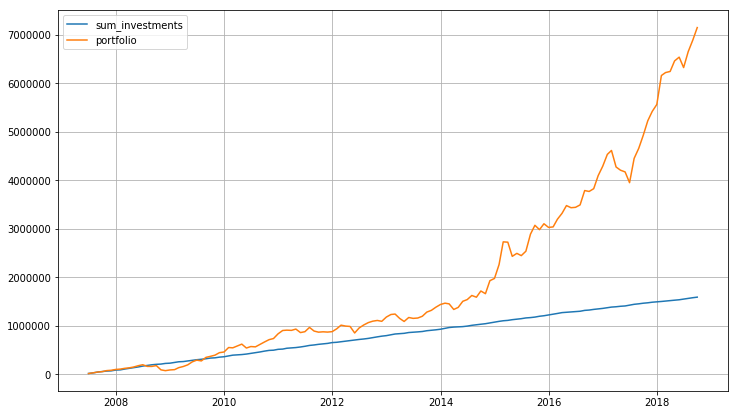

In [49]:
# start balance, just for first time
last_balance = 1000.0

# start current money
cur_money = 0.0

# save history
save_history = []

# massiv for saving our investments and deals
total_investments = []
total_investments.append(cur_money)
sdelki = []
divs_year= []

# create DF for saving information
a =np.vstack([stocks_all,[0]*len(stocks_all)])
portfolio = pd.DataFrame(a,columns=stocks_all).drop(0)
aktiv = pd.DataFrame(a,columns=stocks_all).drop(0)

# minimal sum for add every month
min_add_sum = np.random.randint(4000)+4000

##last_portfolio_bal = np.sum(aktiv)

## comissions by MOEX and broker
comis = 0.0017
depo_comis = 150



for idx, month in enumerate(months):
    ## take random day n month for investments - for exmaple
    day = rand_date(prices[prices['month_id']==month].date.values)
    
    ## take all preces our stocks in that day
    price = prices[prices.date==day][['close','paper']]
    stocks = []
    
    # part of portfolio for one stock
    for idx, paper in enumerate(stocks_all):
        if price[price.paper==paper].close.values<max_bye_price[idx]*in_lot[in_lot.stock==paper].stock_in_lot.values:
            stocks.append(paper)
#         else: 
#             if paper in ['MTSS','LKOH']:
#                 print paper, day, max_bye_price[idx],in_lot[in_lot.stock==paper].stock_in_lot.values,price[price.paper==paper].close.values
        
    if len(stocks)>1: dolya = 1.0/len(stocks)
    else: dolya = 1.0
    
    ## every month add money, growing function becose we have inflation
    add_money = np.random.randint(14000)+4000#min_add_sum#*(1+idx/50.0)
    
    ## current money on account
    cur_money+=add_money
    #print 'start money:',cur_money
    
    ## saving sum of our investments 
    total_investments.append(add_money)
    
    
    
    not_bye_paper = []
    
    ## check button 
    check=1 
    
    # minus month comission for payment to depositary
    cur_money-=depo_comis
    
    stoper = 0
    
    while check!=0:
        for idz,stock in enumerate(stocks):
            if int(aktiv[stock].sum())*price[price.paper==stock].close.values<dolya*(last_balance+cur_money):
                if cur_money - np.float(price[price['paper']==stock].close)*(1+comis)>0:
                    cur_money = cur_money - np.float(price[price['paper']==stock].close)*(1+comis)
                    print ('after buy',stock, np.float(price[price['paper']==stock].close),cur_money)
                    sdelki.append([stock,1,day])
                else: 
                    sdelki.append([stock,0,day])
                    print ('not enough money for buy',stock, np.float(price[price['paper']==stock].close), cur_money)
                    check=0
            else: not_bye_paper.append(stock)
        for stock in list(set(stocks_all)-set(stocks))+list(set(not_bye_paper)):
            sdelki.append([stock,0,day])
            print ('paper is expensive or you enough to by they (dolya>)',stock,cur_money)
         
        sdelki1 = pd.DataFrame(sdelki)
        aktiv = pd.pivot_table(sdelki1, index=[2], columns=[0],aggfunc=sum)
        aktiv = aktiv.fillna(0)
        aktiv.columns = aktiv.columns.levels[1]
      
        last_balance = cur_money
        print ('')
        for i in stocks_all:
            try: 
                last_balance +=aktiv[i].sum()*price[price.paper==i].close.values
                print ('in portfolio',aktiv[i].sum(),i,price[price.paper==i].close.values, aktiv[i].sum()*price[price.paper==i].close.values)
            except ValueError:
                continue
        
        stoper +=1
        if stoper>12: 
            print ('all stocks is so expensive :))')
            print ('')
            check=0
    
    divs_now = divs[divs.month_id==month]
    
    dividends = 0
    for paper in aktiv.columns:
        dividend = 0
        if divs_now[divs_now.tiker==paper].div_by_lot.values>0:
            dividend = aktiv[paper].sum()*divs_now[divs_now.tiker==paper].div_by_lot.values
            divs_year.append([month,float(dividend)*0.87,paper])
            print (month, paper, 'dividend -', float(dividend)*0.87)
        dividends += dividend
    
    #Если дивиденды снимаем - комментируем следующую строку
    cur_money +=float(dividends)*0.87
    print (month, add_money,np.sum(total_investments),last_balance,cur_money)
    if dividends>0: print ('In this month your dividend is ',dividends*0.87)
    
    
    save_history.append([month,np.sum(total_investments),last_balance])
print (name, ', your score:',last_balance/np.sum(total_investments))
save_history = pd.DataFrame(save_history, columns = ['month','sum_investments','portfolio'])
plt.figure(figsize=(12,7))
dates = pd.date_range(start='30/06/2007', periods=len(months), freq='M')
plt.plot(dates, save_history.sum_investments)
plt.plot(dates, save_history.portfolio)
plt.grid()
plt.legend()
plt.show()

Юрий , your score: [4.49144156] 11658 1592406.0 [7152198.495773]


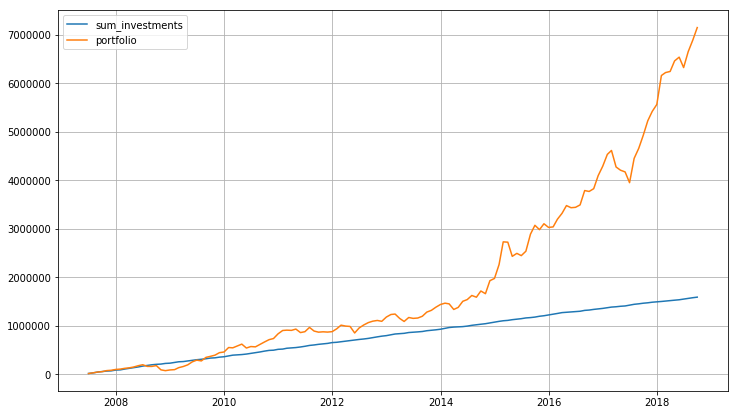

<Figure size 432x288 with 0 Axes>

In [50]:
print (name, ', your score:',last_balance/np.sum(total_investments),add_money,np.sum(total_investments),last_balance)
plt.figure(figsize=(12,7))
dates = pd.date_range(start='30/06/2007', periods=len(months), freq='M')
plt.plot(dates, save_history.sum_investments)
plt.plot(dates, save_history.portfolio)
plt.grid()
plt.legend()
plt.show()
plt.savefig('investments.png')

In [51]:
divs_year = pd.DataFrame(divs_year, columns=['month','money','paper'])
divs_year['year'] = divs_year['month'].apply(lambda x : int(x/100.0))
divs_year_total = pd.DataFrame(divs_year.groupby(['year'])['money'].sum())
divs_year_total

,money
year,
2007,586.3800
2008,5667.4236
2009,8044.5768
2010,15689.4930
2011,30810.9630
2012,39848.6274
2013,61725.9867
2014,130335.9876
2015,211606.7070


In [52]:
print (divs_year_total.sum())
print (sum(total_investments))

money    1.429346e+06
dtype: float64
1592406.0


In [53]:
divs_paper_total = pd.DataFrame(divs_year.groupby(['paper'])['money'].sum())
divs_paper_total

,money
paper,
AKRN,149841.8400
CHMF,205111.5480
GMKN,164555.1495
LKOH,88209.3000
MAGN,94064.4000
MTSS,78266.3310
NLMK,80852.1450
SBER,37778.0970
SIBN,69201.1920


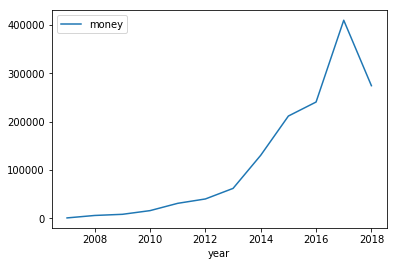

In [54]:
divs_year_total.plot()

In [55]:
aktiv.sum()

0
AKRN     125
CHMF      67
GMKN      63
LKOH     137
MAGN     138
MTSS      65
NLMK     255
SBER     171
SIBN     166
SNGSP    114
TATNP    197
VSMO      28
dtype: int64

In [56]:
sdelki = pd.DataFrame(sdelki)

In [57]:
aktiv = pd.pivot_table(sdelki, index=[2], columns=[0],aggfunc=np.sum)
aktiv = aktiv.fillna(0)
aktiv.columns = aktiv.columns.levels[1]

In [58]:
print ('Total investments')
np.sum(total_investments)

Total investments


1592406.0

In [60]:
print ('Now portfolio wheight')
last_balance = cur_money
for i in stocks_all:
    last_balance +=aktiv[i].sum()*price[price.paper==i].close.values
    print (i,aktiv[i].sum()*price[price.paper==i].close.values)
print (last_balance)

Now portfolio wheight
CHMF [734588.]
TATNP [1052374.]
NLMK [429981.]
GMKN [710136.]
AKRN [574000.]
VSMO [474040.]
MAGN [671922.]
SNGSP [435252.]
MTSS [170982.5]
SIBN [562076.]
SBER [310450.5]
LKOH [646023.5]
[7171288.035773]
